In [146]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [65]:
train_fname = 'data/train_2.csv'
test_fname = 'data/test_2.csv'
df = pd.read_csv(train_fname, sep=';')
df_test = pd.read_csv(test_fname, sep=';')

In [66]:
df.iloc[:,0:20].head(5)

,VOIE_DEPOT,COUNTRY,SOURCE_BEGIN_MONTH,APP_NB,APP_NB_PAYS,APP_NB_TYPE,FISRT_APP_COUNTRY,FISRT_APP_TYPE,LANGUAGE_OF_FILLING,FIRST_CLASSE,NB_CLASSES,NB_ROOT_CLASSES,NB_SECTORS,NB_FIELDS,TECHNOLOGIE_SECTOR,TECHNOLOGIE_FIELD,MAIN_IPC,INV_NB,INV_NB_PAYS,INV_NB_TYPE
0,EURO-PCT,US,D0,1,1,1,US,COMPAGNY,en,A61K9/48,2,1,1,1,III - Chemistry,16 - Pharmaceuticals,A61K,2,1,0
1,EURO-PCT,DE,D0,1,1,1,DE,COMPAGNY,de,C08G65/26,2,2,1,2,III - Chemistry,"17 - Macromolecular chemistry, polymers",C08G,8,1,0
2,VOIE DIRECTE,JP,D0,1,1,1,JP,COMPAGNY,en,G11B15/07,4,1,1,1,I - Electrical engineering,2 - Audio-visual technology,G11B,9,1,1
3,VOIE DIRECTE,GB,D0,1,1,1,GB,COMPAGNY,en,F25B41/04,2,2,1,2,IV - Mechanical engineering,30 - Thermal processes and apparatus,F25B,1,1,0
4,VOIE DIRECTE,DE,D0,1,1,1,DE,COMPAGNY,de,H01F17/06,1,1,1,1,I - Electrical engineering,"1 - Electrical machinery, apparatus, energy",H01F,1,1,0


In [67]:
df.iloc[:,20:40].head(5)

,FISRT_INV_COUNTRY,FISRT_INV_TYPE,cited_n,cited_nmiss,cited_age_min,cited_age_median,cited_age_max,cited_age_mean,cited_age_std,SOURCE_CITED_AGE,NB_BACKWARD_NPL,NB_BACKWARD_XY,NB_BACKWARD_I,NB_BACKWARD_AUTRE,NB_BACKWARD_PL,NB_BACKWARD,pct_NB_IPC,pct_NB_IPC_LY,oecd_NB_ROOT_CLASSES,oecd_NB_BACKWARD_PL
0,GB,(MISSING),NaN,NaN,7665,7665.0,7665,7665.000000,NaN,IMPUT,0,0,0,0,0,0,0.965563,0.723658,0.142857,0.000000
1,DE,(MISSING),NaN,NaN,7665,7665.0,7665,7665.000000,NaN,IMPUT,0,0,0,0,0,0,0.850490,0.697254,0.200000,0.000000
2,JP,COMPAGNY,6,0,256,1147.0,3365,1371.166667,1188.268558,CALC,1,3,0,8,11,12,0.933952,0.821558,0.166667,0.785714
3,GB,(MISSING),NaN,NaN,7665,7665.0,7665,7665.000000,NaN,IMPUT,0,3,0,0,3,3,0.520361,0.830949,0.400000,0.230769
4,DE,(MISSING),2,0,709,1541.5,2374,1541.500000,1177.332791,CALC,0,0,0,6,6,6,1.000000,0.634537,0.200000,0.500000


In [68]:
df.iloc[:,40:50].head(5)

,oecd_NB_BACKWARD_NPL,IDX_ORIGIN,SOURCE_IDX_ORI,IDX_RADIC,SOURCE_IDX_RAD,VARIABLE_CIBLE,PRIORITY_MONTH,FILING_MONTH,PUBLICATION_MONTH,BEGIN_MONTH
0,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,09/1995,08/1996,03/1997,09/1995
1,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,11/1999,11/2000,05/2001,11/1999
2,0.125,0.897778,CALC,1.00,IMPUT,GRANTED,06/1992,05/1993,12/1993,06/1992
3,0.000,1.000000,IMPUT,1.00,IMPUT,GRANTED,05/1994,05/1995,11/1995,05/1994
4,0.000,0.625000,CALC,0.25,CALC,GRANTED,12/1988,11/1989,06/1990,12/1988


In [213]:
X = df.values
X = np.delete(X, 45, 1)
X = np.concatenate((X, df_test.values))
n_samples, n_features = X.shape
X.shape

(389146, 49)

In [214]:
n_samples, n_features = X.shape

In [215]:
cnt = np.zeros(n_features)

In [216]:
for j in range(n_features):
    for i in range(n_samples):
        if(pd.isnull(X[i][j]) or (not isinstance(X[i][j],float) and X[i][j] == '(MISSING)')):
            cnt[j] += 1

In [156]:
cnt.shape = (n_features,1)
cnt /= n_samples

lab = np.delete(df.columns.values,45,0)
lab.shape = cnt.shape

In [157]:
A = np.concatenate((lab, cnt), axis=1)

In [158]:
B = pd.DataFrame(A, columns=['Names','Missing ratio'])

In [159]:
B

,Names,Missing ratio
0,VOIE_DEPOT,0
1,COUNTRY,0.084521
2,SOURCE_BEGIN_MONTH,5.13946e-06
3,APP_NB,0.00151614
4,APP_NB_PAYS,0.00151614
5,APP_NB_TYPE,0.00151614
6,FISRT_APP_COUNTRY,0.00152385
7,FISRT_APP_TYPE,0
8,LANGUAGE_OF_FILLING,0.000788907
9,FIRST_CLASSE,0


In [160]:
# Faire tout ça sur la concaténation du train et du test :)
# Faire ensemble les 4 pays avec une priorité : COUNTRY - LANGUAGE_OF_FILLING - FIRST_INV_COUNTRY - FIRST_APP_COUNTRY
# Les valeurs continues se fix en utilisant la moyenne du pays de ce groupe, que l'on a inféré précédemment.
# 0 - Country : Mettre LANGUAGE_OF_FILLING
# 1 - SOURCE_BEGIN_MONTH: Mettre le plus commun entre d0 et d1
# 2 - 5 : Imputer avec la moyenne ou prendre la moyenne du même FISRT_APP_COUNTRY.
# 6 - FISRT_APP_COUNTRY : Mettre COUNTRY
# 8 : LANGUAGE_OF_FILLING : Mettre COUNTRY
# 17 - 19 : Moyenne ou moyenne du même pays d'invention.
# 20 : Mettre COUNTRY
# 22 : CITED_N : Difficile à inférer... Il manque 64% des valeurs... On garde ou pas ? On pourrait prendre la moyenne sur le pays.
# 23 : CITED_NMISS : On vire, n'explique rien.
# 28 : cited_age_std : 83% missing, et puis wtf on s'en fout de std. On vire.

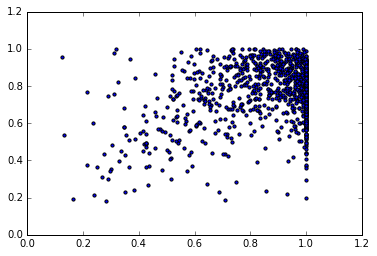

In [161]:
plt.scatter(X[0:1000,36],X[0:1000,37],s=10)

In [162]:
print(sum(X[0:1000,36] == 1.))

278


In [163]:
# 37 : Peu de valeurs manquent, on pourrait mettre la moyenne. Peut-être inférable avec la moyenne sur le pays...
# 45 : PRIORITY_MONTH : Moyenne ou inférence avec les autres dates ? Régression linéaire avec les 3 autres.

In [164]:
for i in range(n_samples):
    r = X[i]
    if(pd.isnull(r[1]) and pd.isnull(r[6]) and pd.isnull(r[8]) and pd.isnull(r[20])):
        print(i)
        print(r)

356643
['EURO-PCT' nan 'D1' nan nan nan nan '(MISSING)' nan 'B41M5/26' 1 1 1 1
 'IV - Mechanical engineering' '28 - Textile and paper machines' 'B41M' nan
 nan nan nan '(MISSING)' nan nan 7665 7665.0 7665 7665.0 nan 'IMPUT' 0 0 0
 0 0 0 0.7533855832999999 0.9347675411 0.14285714289999998 0.0 0.0 1.0
 'IMPUT' 1.0 'IMPUT' nan '07/2003' '01/2004' '07/2003']


In [165]:
# Nice :) Il y a toujours au moins un pays présent sauf pour un sample du test !

In [217]:
# Les pays :

for i in range(n_samples):
    if(not pd.isnull(X[i][8])):
        X[i][8] = X[i][8].upper()

In [218]:
country_cnt = defaultdict(lambda : 0)

In [219]:
for i in range(n_samples):
    if(not pd.isnull(X[i][0]) and X[i][0] == 'EURO-PCT' and not pd.isnull(X[i][1])):
        country_cnt[X[i][1]] += 1

In [220]:
# Les US ont le plus de samples via EURO-PCT, on va donc dire que le sample manquant vient des US :
X[356643][1] = 'US'

In [170]:
for i in range(n_samples):
    r = X[i]
    if(pd.isnull(r[1]) and pd.isnull(r[6]) and pd.isnull(r[8]) and pd.isnull(r[20])):
        print(i)
        print(r)

In [ ]:
# Problem solved.

In [221]:
for i in range(n_samples):
    r = X[i]
    if(not pd.isnull(r[8])):
        value = r[8]
    if(not pd.isnull(r[20])):
        value = r[20]
    if(not pd.isnull(r[6])):
        value = r[6]
    if(not pd.isnull(r[1])):
        value = r[1]
    
    if(pd.isnull(r[1])):
        X[i][1] = value
    if(pd.isnull(r[6])):
        X[i][6] = value
    if(pd.isnull(r[8])):
        X[i][8] = value
    if(pd.isnull(r[20])):
        X[i][20] = value

In [172]:
cnt = np.zeros(n_features)

for j in range(n_features):
    for i in range(n_samples):
        if(pd.isnull(X[i][j]) or (not isinstance(X[i][j],float) and X[i][j] == '(MISSING)')):
            cnt[j] += 1
            
cnt.shape = (n_features,1)
cnt /= n_samples

lab = np.delete(df.columns.values,45,0)
lab.shape = cnt.shape

A = np.concatenate((lab, cnt), axis=1)
B = pd.DataFrame(A, columns=['Names','Missing ratio'])
B

,Names,Missing ratio
0,VOIE_DEPOT,0
1,COUNTRY,0
2,SOURCE_BEGIN_MONTH,5.13946e-06
3,APP_NB,0.00151614
4,APP_NB_PAYS,0.00151614
5,APP_NB_TYPE,0.00151614
6,FISRT_APP_COUNTRY,0
7,FISRT_APP_TYPE,0
8,LANGUAGE_OF_FILLING,0
9,FIRST_CLASSE,0


In [ ]:
# Il n'y a plus de trou pour les pays et la langue !

In [222]:
# 2 : SOURCE_BEGIN_MONTH
for i in range(n_samples):
    if(pd.isnull(X[i][2])):
        X[i][2] = 'D0'

In [223]:
# 3 - 5 : APP_NB. On met la moyenne sur le pays !

def getMeans(x):
    sums = defaultdict(lambda : 0)
    cmp = defaultdict(lambda  : 0)
    for i in range(n_samples):
        if(not pd.isnull(X[i][x])):
            sums[X[i][1]] += X[i][x]
            cmp[X[i][1]] += 1
    
    return {k: float(sums[k])/cmp[k] for k in cmp}

In [224]:
for k in range(3,6):
    means = getMeans(k)
    mean = 0
    cnt = 0
    for i in range(n_samples):
        if(not pd.isnull(X[i][k])):
            mean += X[i][k]
            cnt += 1
    mean /= cnt
    for i in range(n_samples):
        if(pd.isnull(X[i][k])):
            if(X[i][1] in means):
                X[i][k] = means[X[i][1]]
            else:
                X[i][k] = mean

In [182]:
cnt = np.zeros(n_features)

for j in range(n_features):
    for i in range(n_samples):
        if(pd.isnull(X[i][j]) or (not isinstance(X[i][j],float) and X[i][j] == '(MISSING)')):
            cnt[j] += 1
            
cnt.shape = (n_features,1)
cnt /= n_samples

lab = np.delete(df.columns.values,45,0)
lab.shape = cnt.shape

A = np.concatenate((lab, cnt), axis=1)
B = pd.DataFrame(A, columns=['Names','Missing ratio'])
B

,Names,Missing ratio
0,VOIE_DEPOT,0
1,COUNTRY,0
2,SOURCE_BEGIN_MONTH,0
3,APP_NB,0
4,APP_NB_PAYS,0
5,APP_NB_TYPE,0
6,FISRT_APP_COUNTRY,0
7,FISRT_APP_TYPE,0
8,LANGUAGE_OF_FILLING,0
9,FIRST_CLASSE,0


In [225]:
# 17 - 19 : INV_NB. On met la moyenne sur le pays d'invention !

def getMeans2(x):
    sums = defaultdict(lambda : 0)
    cmp = defaultdict(lambda : 0)
    for i in range(n_samples):
        if(not pd.isnull(X[i][x])):
            sums[X[i][20]] += X[i][x]
            cmp[X[i][20]] += 1
    
    return {k: float(sums[k])/cmp[k] for k in cmp}

In [226]:
for k in range(17,20):
    means = getMeans2(k)
    mean = 0
    cnt = 0
    for i in range(n_samples):
        if(not pd.isnull(X[i][k])):
            mean += X[i][k]
            cnt += 1
    mean /= cnt
    for i in range(n_samples):
        if(pd.isnull(X[i][k])):
            if(X[i][20] in means):
                X[i][k] = means[X[i][1]]
            else:
                X[i][k] = mean

In [187]:
cnt = np.zeros(n_features)

for j in range(n_features):
    for i in range(n_samples):
        if(pd.isnull(X[i][j]) or (not isinstance(X[i][j],float) and X[i][j] == '(MISSING)')):
            cnt[j] += 1
            
cnt.shape = (n_features,1)
cnt /= n_samples

lab = np.delete(df.columns.values,45,0)
lab.shape = cnt.shape

A = np.concatenate((lab, cnt), axis=1)
B = pd.DataFrame(A, columns=['Names','Missing ratio'])
B

,Names,Missing ratio
0,VOIE_DEPOT,0
1,COUNTRY,0
2,SOURCE_BEGIN_MONTH,0
3,APP_NB,0
4,APP_NB_PAYS,0
5,APP_NB_TYPE,0
6,FISRT_APP_COUNTRY,0
7,FISRT_APP_TYPE,0.122448
8,LANGUAGE_OF_FILLING,0
9,FIRST_CLASSE,0


In [227]:
# FIRST_APP_TYPE et FIRST_INV_TYPE. Compagny est ultra majoritaire, donc autant mettre ça dans les trous.
# Remarquons que FIRST_INT_TYPE a quand même beaucoup de trou, c'est presque virable.

for i in range(n_samples):
    if(X[i][7] == '(MISSING)'):
        X[i][7] = 'COMPAGNY'
    if(X[i][21] == '(MISSING)'):
        X[i][21] = 'COMPAGNY'

In [201]:
cnt = np.zeros(n_features)

for j in range(n_features):
    for i in range(n_samples):
        if(pd.isnull(X[i][j]) or (not isinstance(X[i][j],float) and X[i][j] == '(MISSING)')):
            cnt[j] += 1
            
cnt.shape = (n_features,1)
cnt /= n_samples

lab = np.delete(df.columns.values,45,0)
lab.shape = cnt.shape

A = np.concatenate((lab, cnt), axis=1)
B = pd.DataFrame(A, columns=['Names','Missing ratio'])
B

,Names,Missing ratio
0,VOIE_DEPOT,0
1,COUNTRY,0
2,SOURCE_BEGIN_MONTH,0
3,APP_NB,0
4,APP_NB_PAYS,0
5,APP_NB_TYPE,0
6,FISRT_APP_COUNTRY,0
7,FISRT_APP_TYPE,0
8,LANGUAGE_OF_FILLING,0
9,FIRST_CLASSE,0


In [228]:
# 22 : INV_NB. On met la moyenne sur le pays !

def getMeans3(x):
    sums = defaultdict(lambda : 0)
    cmp = defaultdict(lambda : 0)
    for i in range(n_samples):
        if(not pd.isnull(X[i][x])):
            sums[X[i][1]] += X[i][x]
            cmp[X[i][1]] += 1
    
    return {k: float(sums[k])/cmp[k] for k in cmp}

In [229]:
k = 22
means = getMeans3(k)
mean = 0
cnt = 0
for i in range(n_samples):
    if(not pd.isnull(X[i][k])):
        mean += X[i][k]
        cnt += 1
mean /= cnt
for i in range(n_samples):
    if(pd.isnull(X[i][k])):
        if(X[i][1] in means):
            X[i][k] = means[X[i][1]]
        else:
            X[i][k] = mean

In [230]:
k = 37
means = getMeans3(k)
mean = 0
cnt = 0
for i in range(n_samples):
    if(not pd.isnull(X[i][k])):
        mean += X[i][k]
        cnt += 1
mean /= cnt
for i in range(n_samples):
    if(pd.isnull(X[i][k])):
        if(X[i][1] in means):
            X[i][k] = means[X[i][1]]
        else:
            X[i][k] = mean

In [232]:
# 45 : PRIORITY_MONTH. Une analyse rapide montre que 45 arrive un an avant 46 à un ou deux mois près.

for i in range(n_samples):
    if(pd.isnull(X[i][45])):
        s = X[i][46].split('/')
        X[i][45] = s[0] + str(int(s[1]) - 1)

In [233]:
# On finit par drop 23 et 28 car elles n'expliquent rien.

X = np.delete(X, (23, 28), 1)

In [234]:
n_samples, n_features = X.shape
cnt = np.zeros(n_features)

for j in range(n_features):
    for i in range(n_samples):
        if(pd.isnull(X[i][j]) or (not isinstance(X[i][j],float) and X[i][j] == '(MISSING)')):
            cnt[j] += 1
            
cnt.shape = (n_features,1)
cnt /= n_samples

lab = np.delete(df.columns.values,(23,28,45),0)
lab.shape = cnt.shape

A = np.concatenate((lab, cnt), axis=1)
B = pd.DataFrame(A, columns=['Names','Missing ratio'])
B

,Names,Missing ratio
0,VOIE_DEPOT,0
1,COUNTRY,0
2,SOURCE_BEGIN_MONTH,0
3,APP_NB,0
4,APP_NB_PAYS,0
5,APP_NB_TYPE,0
6,FISRT_APP_COUNTRY,0
7,FISRT_APP_TYPE,0
8,LANGUAGE_OF_FILLING,0
9,FIRST_CLASSE,0


In [235]:
pd.DataFrame(data=X[0:df.shape[0]], columns=np.delete(df.columns.values,(23,28,45),0)).to_csv(path_or_buf='data/train_bis.csv', sep=';')
pd.DataFrame(data=X[df.shape[0]:], columns=np.delete(df.columns.values,(23,28,45),0)).to_csv(path_or_buf='data/test_bis.csv', sep=';')